#### FastAI UNet - Training
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [1]:
import os
import numpy as np
from pathlib import Path

from fastai.vision.all import *

cwd = Path.cwd()
path = os.path.join(cwd, "training_images")
path

'/home/rahul/workspace/vision/eeb/mothra/data/training_images'

In [2]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])
print("Codes: ", codes)

Total Images: 8  	 Sample:  /home/rahul/workspace/vision/eeb/mothra/data/training_images/images/IMG_1763.JPG
Codes:  ['background' 'lepidopteran' 'tags' 'ruler']


<Axes: >

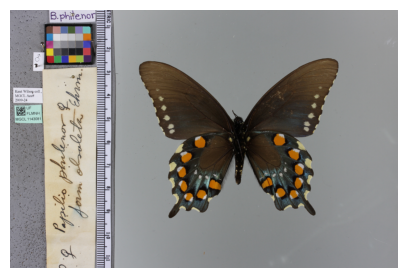

In [3]:
img = PILImage.create(files[1])
img.show(figsize=(5,5))

<Axes: >

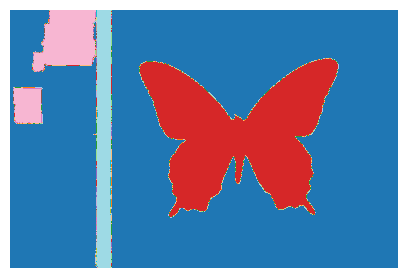

In [4]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

msk = PILMask.create(label_func(files[1]))
msk.show(figsize=(5,5), alpha=1)

In [5]:
name2id = {v:k for k,v in enumerate(codes)}
print("Unique labels:",np.unique(msk), "\n", name2id)

Unique labels: [0 1 2 3] 
 {'background': 0, 'lepidopteran': 1, 'tags': 2, 'ruler': 3}


/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


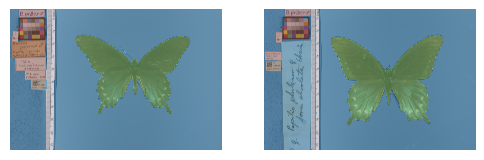

In [6]:
dls = SegmentationDataLoaders.from_label_func(path, bs=2, fnames=files, label_func=label_func, codes=codes)
dls.show_batch()

In [7]:
## Train

In [8]:
# Now, loading the model 
learn = unet_learner(dls, resnet18,  pretrained=True) # self_attention=True, weights="./init/segmentation_test-4classes.pkl"

In [9]:
# Train for 20 epochs
learn.fine_tune(20)

epoch,train_loss,valid_loss,time
0,9.550217,1.271781,08:14


epoch,train_loss,valid_loss,time
0,0.946424,0.634352,08:03
1,0.685427,0.644032,07:56
2,0.557560,0.850791,07:54
3,0.454212,0.424064,07:56
4,0.383510,0.162632,07:57
5,0.332988,0.105911,08:01
6,0.292300,0.138187,07:53
7,0.258884,0.106230,07:54
8,0.231926,0.058085,07:52
9,0.206668,0.040401,07:54


In [10]:
# Model export using pickle protocol - https://docs.fast.ai/learner.html#learner
learn.export('battus10_segmentation_test-4classes-resnet18-b2-e20.pkl')

/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


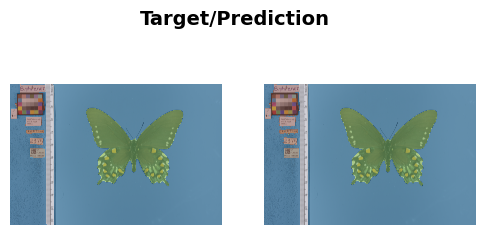

In [11]:
learn.show_results(max_n=2)